<h1 style="color:green" align="center">Exploratory Data Analysis :Retail superstore</h1>

<h3 style="color:purple"> problem statement:</h3>
<h4 style="color:blue"> problem:1</h4>
As a store manager try to find out the weak areas where you can work to increase profit
<h4 style="color:blue"> problem:2</h4>
What all problems you can derive by exploring data

### imorting all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import data

In [2]:
df=pd.read_csv(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df.shape

(9994, 13)

### checking for any missing values

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### checking for corealation

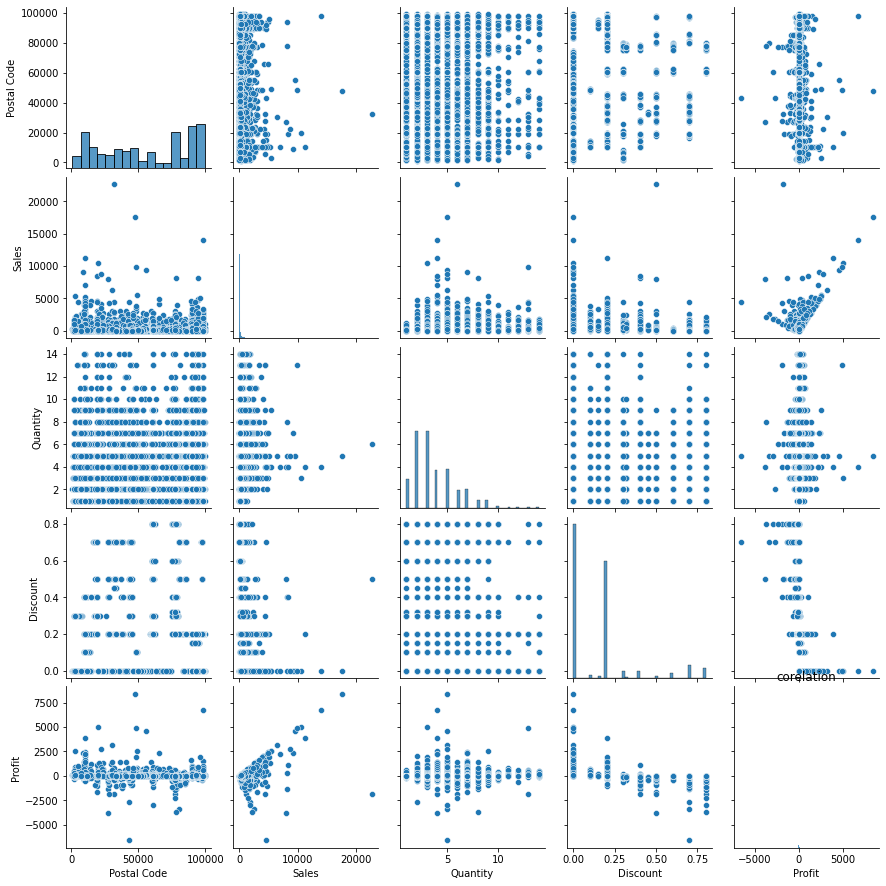

In [5]:
sns.pairplot(df)
plt.title('corelation')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\pair_plot')
plt.show()

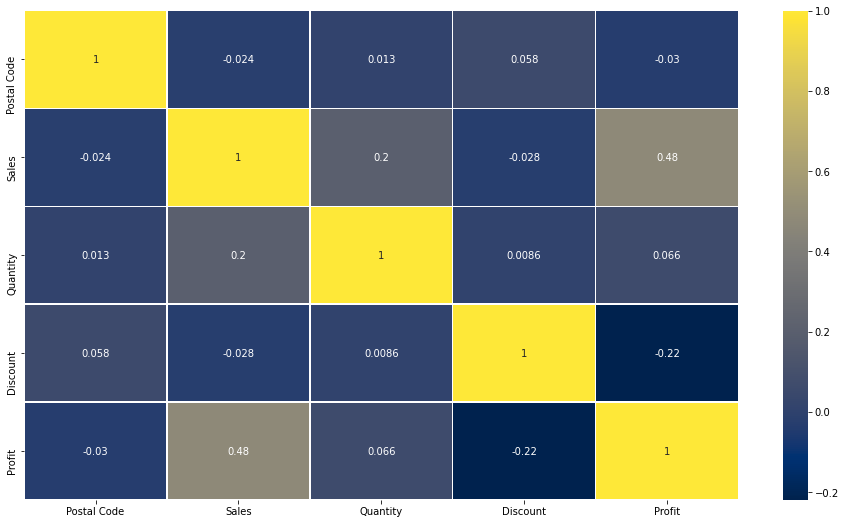

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap ='cividis',linewidth = 0.30, annot = True)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\heatmap')
plt.show()

### exploring features on by one

# city

In [7]:
cities=df['City'].unique()
cities

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [8]:
len(cities)

531

In [9]:
cities_by_counts=df.City.value_counts()
#cities_by_counts

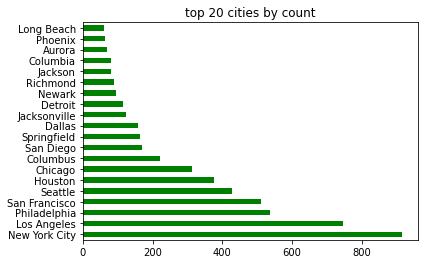

In [10]:
cities_by_counts[:20].plot(kind='barh',color='g')
plt.title('top 20 cities by count')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\cities_bar_chart')
plt.show()

In [11]:
negtive_cities=[]
postive_cities=[]
profit_of_cities=[]
loss_of_cities=[]
for city in df['City'].unique():
    if df['Profit'][df['City']==city].mean()<=0:
        negtive_cities.append(city)
        loss_of_cities.append(df['Profit'][df['City']==city].mean())
    else:
        postive_cities.append(city)
        profit_of_cities.append(df['Profit'][df['City']==city].mean())       

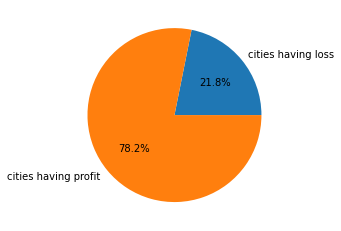

In [12]:
plt.pie([len(negtive_cities),len(postive_cities)],labels=['cities having loss','cities having profit'],autopct='%1.1f%%')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\piechart_cities')
plt.show()

In [13]:
len(negtive_cities)

116

In [14]:
len(postive_cities)

415

In [15]:
df2=pd.DataFrame(list(zip(postive_cities,profit_of_cities)),columns =['city_name', 'av_profit']).sort_values(by='av_profit', ascending=False)[:20]
#df2

In [16]:
df3=pd.DataFrame(list(zip(negtive_cities,loss_of_cities)),columns =['city_name', 'av_loss']).sort_values(by='av_loss', ascending=False)[:20]
#df3

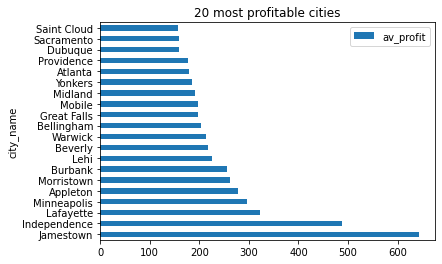

In [17]:
df2.plot(kind='barh',x="city_name",y="av_profit")
plt.title('20 most profitable cities')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\positive_cities')
plt.show()

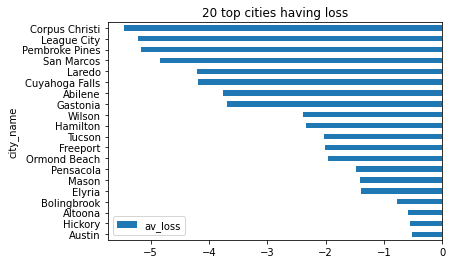

In [18]:
df3.plot(kind='barh',x="city_name",y="av_loss")
plt.title('20 top cities having loss')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\negative_cities')
plt.show()

# states

In [19]:
states=df['State'].unique()
states

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [20]:
len(states)

49

In [21]:
states_by_counts=df.State.value_counts()
#states_by_counts

In [ ]:
states_by_counts[:20].plot(kind='barh')
plt.title('top twenty states by count')
plt.show()

In [ ]:
negtive_states=[]
postive_states=[]
profit_of_states=[]
loss_of_states=[]
for state in df['State'].unique():
    if df['Profit'][df['State']==state].mean()<=0:
        negtive_states.append(state)
        loss_of_states.append(df['Profit'][df['State']==state].mean())
    else:
        postive_states.append(state)
        profit_of_states.append(df['Profit'][df['State']==state].mean())

In [ ]:
len(negtive_states)

In [ ]:
len(postive_states)

In [ ]:
plt.pie([len(negtive_states),len(postive_states)],labels=['states having loss','states having profit'],autopct='%1.1f%%')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\piechart_states')
plt.show()

In [ ]:
df4=pd.DataFrame(list(zip(postive_states,profit_of_states)),columns =['state_name', 'av_profit']).sort_values(by='av_profit', ascending=False)[:20]
# df4

In [ ]:
df5=pd.DataFrame(list(zip(negtive_states,loss_of_states)),columns =['state_name', 'av_loss']).sort_values(by='av_loss', ascending=False)[:20]
# df5

In [ ]:
df4.plot(kind='barh',x="state_name",y="av_profit")
plt.title('20 most profitable states')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\postive_states')
plt.show()

In [ ]:
df5.plot(kind='barh',x="state_name",y="av_loss")
plt.title('10 states having loss')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\negative_states')
plt.show()

# country

In [ ]:
df['Country'].unique()

# catagary

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Category',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Category',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\catagary.png')
plt.show()

#### result: technology items are less sold but more profitable 

# ship mode 

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Ship Mode',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Ship Mode',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\ship_mode.png')
plt.show()

#### result: no more difference with respect to profit

# segment

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Segment',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\segment.png')
plt.show()

#### result: we must increase Home office segment to increase profit as it is more profitable

# region

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Region',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Region',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\region.png')
plt.show()

#### regions satuation is good no more difference

# sub catagary

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(x='Sub-Category',data=df)
plt.subplot(2, 1, 2)
sns.barplot(x='Sub-Category',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\sub_catagory.png')
plt.show()

#### result: tables and machines are in loss we have to increase sales of Copiers as it is profitable but very less sold

# quantity

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(x='Quantity',data=df)
plt.subplot(2, 1, 2)
sns.barplot(x='Quantity',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\quantity.png')
plt.show()

#### result: we have to increase quantity till 10 and 11 as it is more profitable . if quantity is 12 or 13 it is more profitable but it is in loss also

In [ ]:
#plt.figure()
sns.relplot(x="Quantity",y="Profit",data=df,kind='line')
plt.title('graph of profit VS quantity')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\quantity_graph.png')
plt.show()

#### result: this graph shows that while increasing quantity till quantity is 11 generally profit increased slowly, after which downfall is also occurs

# discount

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1, 1)
sns.countplot(x='Discount',data=df)
plt.subplot(2,1, 2)
sns.barplot(x='Discount',y='Profit',data=df)
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\discount.png')
plt.show()

In [ ]:
#plt.figure()
sns.relplot(x="Discount",y="Profit",data=df,kind='line')
plt.title('graph of profit VS discount')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\discount_graph.png')
plt.show()

#### result: above chart and graph shows that of discount 0% to  10 % than it leads to profit otherwise it leads to loss overally discount have negatve effect on profit

# sales

In [ ]:
sns.distplot(df['Sales'])
plt.show()

In [ ]:
plt.plot(df["Sales"],df["Profit"])
plt.title('graph of Sales VS profit')
plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\sales_graph')
plt.show()

#### result: sales leads to profit as well as loss

_____________________________________________

<h4 style="color:blue"> Conclusions</h4> <h5 style="color:green">these are problems on which we have to reduce these to genarate more profit</h5>

<h3 style="color:purple">1.Discount </h3>we have to limit our discount from 0 % to 10%
<h3 style="color:purple">2.Catagary,Subcatagary and Segment </h3>we have to increase sales of thing having catagary:Technology ,subcatagary:Copiers with segment:office segment
<h3 style="color:purple">3.Quantity </h3>Quantity of items should be in between 1 to 11
<h3 style="color:purple">4.sales </h3>We have to increase our sale to take more profit but must follow other instructions otherwise in loss or less profit
<h3 style="color:purple">5.Cities and states </h3> there are 116 cities and 10 states in which our sale in loss